## Installing technical analysis library

In [ ]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pytrends.request import TrendReq

## Importing basic python libraries

In [ ]:
import pandas as pd
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Importing ML libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn import metrics 

## Disabling warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import ta

## Importing dataset

In [ ]:
btc_hourly_trend_data_2016_15 = pd.read_csv('btc_hourly_trend_data_2016_15.csv')
btc_hourly_trend_data_2016_15["date"]=pd.to_datetime(btc_hourly_trend_data_2016_15['date'])
btc_hourly_trend_data_2016_15.rename(columns = {'date':'date_time'}, inplace = True) 
btc_hourly_trend_data_2016_15 = btc_hourly_trend_data_2016_15.set_index("date_time")

In [ ]:
btc_hourly_trend_data_2018_17 = pd.read_csv('btc_hourly_trend_data_2018_17.csv')
btc_hourly_trend_data_2018_17["date"]=pd.to_datetime(btc_hourly_trend_data_2018_17['date'])
btc_hourly_trend_data_2018_17.rename(columns = {'date':'date_time'}, inplace = True) 
btc_hourly_trend_data_2018_17 = btc_hourly_trend_data_2018_17.set_index("date_time")

In [ ]:
btc_hourly_trend_data_2021_19 = pd.read_csv('btc_hourly_trend_data_2021_19.csv')
btc_hourly_trend_data_2021_19["date"]=pd.to_datetime(btc_hourly_trend_data_2021_19['date'])
btc_hourly_trend_data_2021_19.rename(columns = {'date':'date_time'}, inplace = True) 
btc_hourly_trend_data_2021_19 = btc_hourly_trend_data_2021_19.set_index("date_time")

In [ ]:
btc_usd_data = pd.read_csv('ethusd.csv')

In [ ]:
btc_usd_data.head()

,time,open,close,high,low,volume
0,1457539440000,10.297,10.097,10.297,10.097,0.03
1,1457545740000,11.197,11.197,11.197,11.197,0.01
2,1457549760000,11.097,11.097,11.097,11.097,0.02
3,1457554560000,11.195,11.195,11.195,11.195,0.01
4,1457554860000,10.870,10.870,10.870,10.870,1.00


## Renaming columns

In [ ]:
btc_usd_data.rename(columns = {'open':'open_1min'}, inplace = True) 
btc_usd_data.rename(columns = {'close':'close_1min'}, inplace = True) 
btc_usd_data.rename(columns = {'high':'high_1min'}, inplace = True) 
btc_usd_data.rename(columns = {'low':'low_1min'}, inplace = True) 
btc_usd_data.rename(columns = {'volume':'volume_1min'}, inplace = True)
btc_usd_data.head()

,time,open_1min,close_1min,high_1min,low_1min,volume_1min
0,1457539440000,10.297,10.097,10.297,10.097,0.03
1,1457545740000,11.197,11.197,11.197,11.197,0.01
2,1457549760000,11.097,11.097,11.097,11.097,0.02
3,1457554560000,11.195,11.195,11.195,11.195,0.01
4,1457554860000,10.870,10.870,10.870,10.870,1.00


## Getting general dataset stats

In [ ]:
btc_usd_data_1min = btc_usd_data.copy()
btc_usd_data_1min.head()

,time,open_1min,close_1min,high_1min,low_1min,volume_1min
0,1457539440000,10.297,10.097,10.297,10.097,0.03
1,1457545740000,11.197,11.197,11.197,11.197,0.01
2,1457549760000,11.097,11.097,11.097,11.097,0.02
3,1457554560000,11.195,11.195,11.195,11.195,0.01
4,1457554860000,10.870,10.870,10.870,10.870,1.00


In [ ]:
btc_usd_data_1min.describe()

,time,open_1min,close_1min,high_1min,low_1min,volume_1min
count,2.414189e+06,2.414189e+06,2.414189e+06,2.414189e+06,2.414189e+06,2.414189e+06
mean,1.560210e+12,7.759029e+02,7.759106e+02,7.764369e+02,7.753704e+02,1.289520e+02
std,4.653411e+10,1.063918e+03,1.063941e+03,1.064604e+03,1.063256e+03,4.692525e+02
min,1.457539e+12,5.890100e+00,5.861000e+00,5.890100e+00,5.861000e+00,1.000000e-08
25%,1.520975e+12,1.806500e+02,1.806500e+02,1.807300e+02,1.805700e+02,4.971108e+00
50%,1.559370e+12,2.973900e+02,2.974000e+02,2.976000e+02,2.971800e+02,2.500600e+01
75%,1.601582e+12,7.238200e+02,7.238100e+02,7.243500e+02,7.231500e+02,9.949687e+01
max,1.638628e+12,4.863222e+03,4.863222e+03,4.864900e+03,4.859400e+03,6.107060e+04


In [ ]:
btc_usd_data_1min.isnull().sum()

time           0
open_1min      0
close_1min     0
high_1min      0
low_1min       0
volume_1min    0
dtype: int64

In [ ]:
btc_usd_data_1min.shape

(2414189, 6)

## Converting timestamps into dates

In [ ]:
btc_usd_data_1min['date_time'] = 0
btc_usd_data_1min['date_time'] = pd.to_datetime(btc_usd_data_1min["time"], unit = 'ms')
btc_usd_data_1min = btc_usd_data_1min.set_index("date_time")
btc_usd_data_1min.head(20)

,time,open_1min,close_1min,high_1min,low_1min,volume_1min
date_time,,,,,,
2016-03-09 16:04:00,1457539440000,10.297,10.097,10.297,10.097,0.030000
2016-03-09 17:49:00,1457545740000,11.197,11.197,11.197,11.197,0.010000
2016-03-09 18:56:00,1457549760000,11.097,11.097,11.097,11.097,0.020000
2016-03-09 20:16:00,1457554560000,11.195,11.195,11.195,11.195,0.010000
2016-03-09 20:21:00,1457554860000,10.870,10.870,10.870,10.870,1.000000
2016-03-09 20:23:00,1457554980000,10.870,10.660,10.870,10.660,0.099523
2016-03-09 21:47:00,1457560020000,10.870,11.197,11.197,10.870,40.000000
2016-03-10 16:11:00,1457626260000,11.072,11.072,11.072,11.072,0.020000
2016-03-10 16:12:00,1457626320000,11.750,11.750,11.750,11.750,0.010000


## Resampling 5min interval dataset

In [ ]:
# btc_usd_data_5min = pd.DataFrame()
# btc_usd_data_5min['open_5min'] = 0
# btc_usd_data_5min['close_5min'] = 0
# btc_usd_data_5min['high_5min'] = 0
# btc_usd_data_5min['low_5min'] = 0
# btc_usd_data_5min['volume_5min'] = 0
# btc_usd_data_5min['open_5min'] = btc_usd_data_1min['open_1min'].resample('5T',label='right').mean()
# btc_usd_data_5min['close_5min'] = btc_usd_data_1min['close_1min'].resample('5T',label='right').mean()
# btc_usd_data_5min['high_5min'] = btc_usd_data_1min['high_1min'].resample('5T',label='right').max()
# btc_usd_data_5min['low_5min'] = btc_usd_data_1min['low_1min'].resample('5T',label='right').min()
# btc_usd_data_5min['volume_5min'] = btc_usd_data_1min['volume_1min'].resample('5T',label='right').sum()
# btc_usd_data_5min = btc_usd_data_5min.dropna()
# print("dataframe shape: ",btc_usd_data_5min.shape)
# btc_usd_data_5min.head()

## Resampling 15min interval dataset

In [ ]:
# btc_usd_data_15min = pd.DataFrame()
# btc_usd_data_15min['open_15min'] = 0
# btc_usd_data_15min['close_15min'] = 0
# btc_usd_data_15min['high_15min'] = 0
# btc_usd_data_15min['low_15min'] = 0
# btc_usd_data_15min['volume_15min'] = 0
# btc_usd_data_15min['open_15min'] = btc_usd_data_1min['open_1min'].resample('15T',label='right').mean()
# btc_usd_data_15min['close_15min'] = btc_usd_data_1min['close_1min'].resample('15T',label='right').mean()
# btc_usd_data_15min['high_15min'] = btc_usd_data_1min['high_1min'].resample('15T',label='right').max()
# btc_usd_data_15min['low_15min'] = btc_usd_data_1min['low_1min'].resample('15T',label='right').min()
# btc_usd_data_15min['volume_15min'] = btc_usd_data_1min['volume_1min'].resample('15T',label='right').sum()
# btc_usd_data_15min = btc_usd_data_15min.dropna()
# print("dataframe shape: ",btc_usd_data_15min.shape)
# btc_usd_data_15min.head()

## Resampling 30min interval dataset

In [ ]:
# btc_usd_data_30min = pd.DataFrame()
# btc_usd_data_30min['open_30min'] = 0
# btc_usd_data_30min['close_30min'] = 0
# btc_usd_data_30min['high_30min'] = 0
# btc_usd_data_30min['low_30min'] = 0
# btc_usd_data_30min['volume_30min'] = 0
# btc_usd_data_30min['open_30min'] = btc_usd_data_1min['open_1min'].resample('30T',label='right').mean()
# btc_usd_data_30min['close_30min'] = btc_usd_data_1min['close_1min'].resample('30T',label='right').mean()
# btc_usd_data_30min['high_30min'] = btc_usd_data_1min['high_1min'].resample('30T',label='right').max()
# btc_usd_data_30min['low_30min'] = btc_usd_data_1min['low_1min'].resample('30T',label='right').min()
# btc_usd_data_30min['volume_30min'] = btc_usd_data_1min['volume_1min'].resample('30T',label='right').sum()
# btc_usd_data_30min = btc_usd_data_30min.dropna()
# print("dataframe shape: ",btc_usd_data_30min.shape)
# btc_usd_data_30min.head()

## Resampling 60min interval dataset

In [ ]:
# btc_usd_data_60min = pd.DataFrame()
# btc_usd_data_60min['open_60min'] = 0
# btc_usd_data_60min['close_60min'] = 0
# btc_usd_data_60min['high_60min'] = 0
# btc_usd_data_60min['low_60min'] = 0
# btc_usd_data_60min['volume_60min'] = 0
# btc_usd_data_60min['open_60min'] = btc_usd_data_1min['open_1min'].resample('60T',label='right').mean()
# btc_usd_data_60min['close_60min'] = btc_usd_data_1min['close_1min'].resample('60T',label='right').mean()
# btc_usd_data_60min['high_60min'] = btc_usd_data_1min['high_1min'].resample('60T',label='right').max()
# btc_usd_data_60min['low_60min'] = btc_usd_data_1min['low_1min'].resample('60T',label='right').min()
# btc_usd_data_60min['volume_60min'] = btc_usd_data_1min['volume_1min'].resample('60T',label='right').sum()
# btc_usd_data_60min = btc_usd_data_60min.dropna()
# print("dataframe shape: ",btc_usd_data_60min.shape)
# btc_usd_data_60min.head()

### Resampling 120min interval dataset

In [ ]:
btc_usd_data_120min = pd.DataFrame()
btc_usd_data_120min['open_120min'] = 0
btc_usd_data_120min['close_120min'] = 0
btc_usd_data_120min['high_120min'] = 0
btc_usd_data_120min['low_120min'] = 0
btc_usd_data_120min['volume_120min'] = 0
btc_usd_data_120min['open_120min'] = btc_usd_data_1min['open_1min'].resample('120T',label='right').mean()
btc_usd_data_120min['close_120min'] = btc_usd_data_1min['close_1min'].resample('120T',label='right').mean()
btc_usd_data_120min['high_120min'] = btc_usd_data_1min['high_1min'].resample('120T',label='right').max()
btc_usd_data_120min['low_120min'] = btc_usd_data_1min['low_1min'].resample('120T',label='right').min()
btc_usd_data_120min['volume_120min'] = btc_usd_data_1min['volume_1min'].resample('120T',label='right').sum()
btc_usd_data_120min = btc_usd_data_120min.dropna()
print("dataframe shape: ",btc_usd_data_120min.shape)
btc_usd_data_120min.head()

dataframe shape:  (24279, 5)


,open_120min,close_120min,high_120min,low_120min,volume_120min
date_time,,,,,
2016-03-09 18:00:00,10.747000,10.6470,11.197,10.097,0.040000
2016-03-09 20:00:00,11.097000,11.0970,11.097,11.097,0.020000
2016-03-09 22:00:00,10.951250,10.9805,11.197,10.660,41.109523
2016-03-10 18:00:00,11.557333,11.5240,11.850,11.072,1.030000
2016-03-11 12:00:00,11.850000,11.8500,11.850,11.850,0.030000


## Resampling 240min interval dataset

In [ ]:
# btc_usd_data_240min = pd.DataFrame()
# btc_usd_data_240min['open_240min'] = 0
# btc_usd_data_240min['close_240min'] = 0
# btc_usd_data_240min['high_240min'] = 0
# btc_usd_data_240min['low_240min'] = 0
# btc_usd_data_240min['volume_240min'] = 0
# btc_usd_data_240min['open_240min'] = btc_usd_data_1min['open_1min'].resample('240T',label='right').mean()
# btc_usd_data_240min['close_240min'] = btc_usd_data_1min['close_1min'].resample('240T',label='right').mean()
# btc_usd_data_240min['high_240min'] = btc_usd_data_1min['high_1min'].resample('240T',label='right').max()
# btc_usd_data_240min['low_240min'] = btc_usd_data_1min['low_1min'].resample('240T',label='right').min()
# btc_usd_data_240min['volume_240min'] = btc_usd_data_1min['volume_1min'].resample('240T',label='right').sum()
# btc_usd_data_240min = btc_usd_data_240min.dropna()
# print("dataframe shape: ",btc_usd_data_240min.shape)
# btc_usd_data_240min.head()

In [ ]:
# btc_usd_data_240min.isnull().sum()

## Generating and adding all technical analysis features in 120 min dataset

In [ ]:
btc_usd_data_120min = ta.add_all_ta_features(btc_usd_data_120min, open="open_120min", high="high_120min", low="low_120min", close="close_120min", volume="volume_120min", fillna=True)
btc_usd_data_120min.head()

,open_120min,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
date_time,,,,,,,,,,,,,,,,,,,,,
2016-03-09 18:00:00,10.747000,10.6470,11.197,10.097,0.040000,-6.459479e-17,0.040000,-1.614870e-15,0.000000,50.000000,...,-50.000000,0.0,10.647000,0.0,0.000000,0.000000,0.000000,-98.390201,0.000000,0.000000
2016-03-09 20:00:00,11.097000,11.0970,11.097,11.097,0.020000,-6.459479e-17,0.060000,-1.076580e-15,0.009000,100.000000,...,-9.090909,0.0,10.870646,0.0,-4.142012,-0.828402,-3.313609,4.226543,4.139664,4.226543
2016-03-09 22:00:00,10.951250,10.9805,11.197,10.660,41.109523,7.961621e+00,-41.049523,1.933863e-01,-0.676466,0.049298,...,-19.681818,0.0,10.924177,0.0,106.302043,20.597687,85.704357,-1.049833,-1.055383,3.132338
2016-03-10 18:00:00,11.557333,11.5240,11.850,11.072,1.030000,8.128433e+00,-40.019523,1.926191e-01,-0.499856,2.607730,...,-18.596691,0.0,11.210511,0.0,89.027540,34.283657,54.743883,4.949684,4.831084,8.237062
2016-03-11 12:00:00,11.850000,11.8500,11.850,11.850,0.030000,8.128433e+00,-39.989523,1.924822e-01,-0.427050,2.682609,...,-0.000000,0.0,11.490809,0.0,72.770706,41.981067,30.789639,2.828879,2.789605,11.298957


In [ ]:
btc_usd_data_120min.isnull().sum()

open_120min            0
close_120min           0
high_120min            0
low_120min             0
volume_120min          0
                      ..
momentum_ppo_signal    0
momentum_ppo_hist      0
others_dr              0
others_dlr             0
others_cr              0
Length: 88, dtype: int64

## Generating and adding all technical analysis features in 240 min dataset

In [ ]:
# btc_usd_data_240min = ta.add_all_ta_features(btc_usd_data_240min, open="open_240min", high="high_240min", low="low_240min", close="close_240min", volume="volume_240min", fillna=True)
# btc_usd_data_240min.head()

In [ ]:
# btc_usd_data_240min.isnull().sum()

## Generating and adding all technical analysis features in 60 min dataset

In [ ]:
# btc_usd_data_60min = ta.add_all_ta_features(btc_usd_data_60min, open="open_60min", high="high_60min", low="low_60min", close="close_60min", volume="volume_60min", fillna=True)
# btc_usd_data_60min.head()

## Adding Google trends features into dataset

In [ ]:
btc_hourly_trend_data_2015_18 = btc_hourly_trend_data_2016_15.append(btc_hourly_trend_data_2018_17)
btc_hourly_trend_data_2015_21 = btc_hourly_trend_data_2015_18.append(btc_hourly_trend_data_2021_19)

In [ ]:
btc_hourly_trend_data_2015_21.head()

,bitcoin,ethereum,crypto,cryptocurrency,blockchain,isPartial
date_time,,,,,,
2015-01-01 00:00:00,66,0,3,1,1,False
2015-01-01 01:00:00,49,0,2,0,1,False
2015-01-01 02:00:00,56,0,2,0,1,False
2015-01-01 03:00:00,52,0,2,1,1,False
2015-01-01 04:00:00,53,0,2,1,1,False


In [ ]:
btc_hourly_trend_data_2015_21.tail()

,bitcoin,ethereum,crypto,cryptocurrency,blockchain,isPartial
date_time,,,,,,
2021-06-17 19:00:00,54,11,16,4,3,False
2021-06-17 20:00:00,55,12,17,4,3,False
2021-06-17 21:00:00,55,12,18,5,3,False
2021-06-17 22:00:00,51,12,19,5,3,False
2021-06-17 23:00:00,47,11,17,5,3,False


In [ ]:
btc_hourly_trend_data_2015_21 = btc_hourly_trend_data_2015_21.drop(['isPartial'],axis=1)
btc_hourly_trend_data_2015_21["overall_trend_sum"] = btc_hourly_trend_data_2015_21["blockchain"]+btc_hourly_trend_data_2015_21["cryptocurrency"]+btc_hourly_trend_data_2015_21["crypto"]+btc_hourly_trend_data_2015_21["bitcoin"]+btc_hourly_trend_data_2015_21["ethereum"]

###  60min Google trend dataset to 120min

In [ ]:
btc_2hourly_trend_data = pd.DataFrame()
btc_2hourly_trend_data['bitcoin'] = 0
btc_2hourly_trend_data['ethereum'] = 0
btc_2hourly_trend_data['crypto'] = 0
btc_2hourly_trend_data['cryptocurrency'] = 0
btc_2hourly_trend_data['blockchain'] = 0
btc_2hourly_trend_data['overall_trend_sum'] = 0
btc_2hourly_trend_data['bitcoin'] = btc_hourly_trend_data_2015_21['bitcoin'].resample('120T',label='right').sum()
btc_2hourly_trend_data['ethereum'] = btc_hourly_trend_data_2015_21['ethereum'].resample('120T',label='right').sum()
btc_2hourly_trend_data['crypto'] = btc_hourly_trend_data_2015_21['crypto'].resample('120T',label='right').sum()
btc_2hourly_trend_data['cryptocurrency'] = btc_hourly_trend_data_2015_21['cryptocurrency'].resample('120T',label='right').sum()
btc_2hourly_trend_data['blockchain'] = btc_hourly_trend_data_2015_21['blockchain'].resample('120T',label='right').sum()
btc_2hourly_trend_data['overall_trend_sum'] = btc_hourly_trend_data_2015_21['overall_trend_sum'].resample('120T',label='right').sum()

In [ ]:
btc_2hourly_trend_data.head()

,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,
2015-01-01 02:00:00,115,0,5,1,2,123
2015-01-01 04:00:00,108,0,4,1,2,115
2015-01-01 06:00:00,105,0,4,1,2,112
2015-01-01 08:00:00,91,0,4,0,2,97
2015-01-01 10:00:00,79,0,6,1,2,88


In [ ]:
btc_2hourly_trend_data.tail()

,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,
2021-06-17 16:00:00,98,21,30,10,6,165
2021-06-17 18:00:00,101,21,31,10,6,169
2021-06-17 20:00:00,107,23,32,9,6,177
2021-06-17 22:00:00,110,24,35,9,6,184
2021-06-18 00:00:00,98,23,36,10,6,173


In [ ]:
btc_usd_data_120min_googletrend = btc_usd_data_120min.join(btc_2hourly_trend_data)
btc_usd_data_120min_googletrend.head()

,open_120min,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_ppo_hist,others_dr,others_dlr,others_cr,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,,,,,,,,,,,,,,,,
2016-03-09 18:00:00,10.747000,10.6470,11.197,10.097,0.040000,-6.459479e-17,0.040000,-1.614870e-15,0.000000,50.000000,...,0.000000,-98.390201,0.000000,0.000000,144.0,21.0,21.0,4.0,28.0,218.0
2016-03-09 20:00:00,11.097000,11.0970,11.097,11.097,0.020000,-6.459479e-17,0.060000,-1.076580e-15,0.009000,100.000000,...,-3.313609,4.226543,4.139664,4.226543,146.0,22.0,20.0,3.0,25.0,216.0
2016-03-09 22:00:00,10.951250,10.9805,11.197,10.660,41.109523,7.961621e+00,-41.049523,1.933863e-01,-0.676466,0.049298,...,85.704357,-1.049833,-1.055383,3.132338,160.0,29.0,19.0,4.0,26.0,238.0
2016-03-10 18:00:00,11.557333,11.5240,11.850,11.072,1.030000,8.128433e+00,-40.019523,1.926191e-01,-0.499856,2.607730,...,54.743883,4.949684,4.831084,8.237062,129.0,20.0,16.0,3.0,24.0,192.0
2016-03-11 12:00:00,11.850000,11.8500,11.850,11.850,0.030000,8.128433e+00,-39.989523,1.924822e-01,-0.427050,2.682609,...,30.789639,2.828879,2.789605,11.298957,122.0,18.0,20.0,3.0,26.0,189.0


In [ ]:
btc_usd_data_120min_googletrend.tail()

,open_120min,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_ppo_hist,others_dr,others_dlr,others_cr,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,,,,,,,,,,,,,,,,
2021-12-04 08:00:00,3874.278965,3875.199771,3935.600000,3792.3,7879.151836,8.128433,-5.462344e+06,0.271728,-1.196011e+06,17.241620,...,16.303055,-1.804084,-1.820556,36297.105013,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04 10:00:00,3936.358392,3936.798551,3986.900000,3884.7,6029.371120,8.128433,-5.456314e+06,0.269892,-9.720945e+05,20.695614,...,7.207349,1.589564,1.577063,36875.660286,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04 12:00:00,3902.164723,3901.645606,3961.370073,3832.3,5482.031297,8.128433,-5.461796e+06,0.261006,-8.607538e+05,19.017848,...,0.437301,-0.892932,-0.896943,36545.492682,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04 14:00:00,3931.240941,3932.224018,3973.200000,3872.8,3973.581871,8.128433,-5.457823e+06,0.257854,-7.204310e+05,21.978866,...,-5.349819,0.783731,0.780676,36832.694821,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04 16:00:00,3973.608714,3974.130729,3987.000000,3955.0,1664.033807,8.128433,-5.456159e+06,0.257786,-6.075502e+05,21.405682,...,-11.241920,1.065725,1.060087,37226.295938,NaN,NaN,NaN,NaN,NaN,NaN


### Remove NAs from dataset

In [ ]:
print("shape with NAs:",btc_usd_data_120min_googletrend.shape)

shape with NAs: (24279, 94)


In [ ]:
btc_usd_data_120min_googletrend = btc_usd_data_120min_googletrend.dropna(how='any')
print("shape with NAs:",btc_usd_data_120min_googletrend.shape)

shape with NAs: (22247, 94)


In [ ]:
btc_usd_data_120min_googletrend.head()

,open_120min,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_ppo_hist,others_dr,others_dlr,others_cr,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,,,,,,,,,,,,,,,,
2016-03-09 18:00:00,10.747000,10.6470,11.197,10.097,0.040000,-6.459479e-17,0.040000,-1.614870e-15,0.000000,50.000000,...,0.000000,-98.390201,0.000000,0.000000,144.0,21.0,21.0,4.0,28.0,218.0
2016-03-09 20:00:00,11.097000,11.0970,11.097,11.097,0.020000,-6.459479e-17,0.060000,-1.076580e-15,0.009000,100.000000,...,-3.313609,4.226543,4.139664,4.226543,146.0,22.0,20.0,3.0,25.0,216.0
2016-03-09 22:00:00,10.951250,10.9805,11.197,10.660,41.109523,7.961621e+00,-41.049523,1.933863e-01,-0.676466,0.049298,...,85.704357,-1.049833,-1.055383,3.132338,160.0,29.0,19.0,4.0,26.0,238.0
2016-03-10 18:00:00,11.557333,11.5240,11.850,11.072,1.030000,8.128433e+00,-40.019523,1.926191e-01,-0.499856,2.607730,...,54.743883,4.949684,4.831084,8.237062,129.0,20.0,16.0,3.0,24.0,192.0
2016-03-11 12:00:00,11.850000,11.8500,11.850,11.850,0.030000,8.128433e+00,-39.989523,1.924822e-01,-0.427050,2.682609,...,30.789639,2.828879,2.789605,11.298957,122.0,18.0,20.0,3.0,26.0,189.0


In [ ]:
btc_usd_data_120min_googletrend = btc_usd_data_120min_googletrend.loc[btc_usd_data_120min_googletrend['ethereum']>0]

In [ ]:
# btc_usd_data_60min_googletrend = btc_usd_data_60min.join(btc_hourly_trend_data_2015_21)
# btc_usd_data_60min_googletrend.head()

In [ ]:
# btc_usd_data_60min_googletrend = btc_usd_data_60min_googletrend.dropna(how='any')
# btc_usd_data_60min_googletrend.shape

In [ ]:
# btc_usd_data_60min_googletrend.isnull().sum()

In [ ]:
# btc_usd_data_60min_googletrend.head()

## Creating the output column

In [ ]:
# #For 60 min dataset
# btc_usd_data_60min_googletrend["open_60min_shifted"] = 0
# btc_usd_data_60min_googletrend['open_60min_shifted'] = btc_usd_data_60min_googletrend['open_60min'].shift(periods=-1)
# btc_usd_data_60min_googletrend[['open_60min','open_60min_shifted']].head()


In [ ]:

#For 120 min dataset
btc_usd_data_120min_googletrend["open_120min_shifted"] = 0
btc_usd_data_120min_googletrend['open_120min_shifted'] = btc_usd_data_120min_googletrend['open_120min'].shift(periods=-1)
btc_usd_data_120min_googletrend[['open_120min','open_120min_shifted']].head()


,open_120min,open_120min_shifted
date_time,,
2016-03-09 18:00:00,10.747000,11.097000
2016-03-09 20:00:00,11.097000,10.951250
2016-03-09 22:00:00,10.951250,11.557333
2016-03-10 18:00:00,11.557333,11.850000
2016-03-11 12:00:00,11.850000,11.800000


In [ ]:
# btc_usd_data_60min_googletrend["low_60min_shifted"] = 0
# btc_usd_data_60min_googletrend['low_60min_shifted'] = btc_usd_data_60min_googletrend['low_60min'].shift(periods=1)

# btc_usd_data_60min_googletrend['low_60min_profitable'] = 0
# btc_usd_data_60min_googletrend['low_60min_profitable'].loc[btc_usd_data_60min_googletrend['low_60min_shifted'] < btc_usd_data_60min_googletrend['low_60min']] = 1

# btc_usd_data_60min_googletrend = btc_usd_data_60min_googletrend.drop(['low_60min_shifted'],axis=1)
# btc_usd_data_60min_googletrend.head(10)

#For 60 min dataset
# btc_usd_data_60min_googletrend['open_60min_profitable'] = 0
# btc_usd_data_60min_googletrend['open_60min_profitable'].loc[((btc_usd_data_60min_googletrend['open_60min_shifted'])/(btc_usd_data_60min_googletrend['open_60min']))<0.97] = 1

# btc_usd_data_60min_googletrend = btc_usd_data_60min_googletrend.drop(['open_60min_shifted','open_60min'],axis=1)
# btc_usd_data_60min_googletrend.head()

In [ ]:
#For 120 min dataset
btc_usd_data_120min_googletrend['open_120min_profitable'] = 0
btc_usd_data_120min_googletrend['open_120min_profitable'].loc[((btc_usd_data_120min_googletrend['open_120min_shifted'])/(btc_usd_data_120min_googletrend['open_120min']))>1.03] = 1

btc_usd_data_120min_googletrend = btc_usd_data_120min_googletrend.drop(['open_120min_shifted','open_120min'],axis=1)
btc_usd_data_120min_googletrend.head(10)


,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,others_dr,others_dlr,others_cr,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum,open_120min_profitable
date_time,,,,,,,,,,,,,,,,,,,,,
2016-03-09 18:00:00,10.647000,11.197,10.097,0.040000,-6.459479e-17,0.040000,-1.614870e-15,0.000000,50.000000,0.000000e+00,...,-98.390201,0.000000,0.000000,144.0,21.0,21.0,4.0,28.0,218.0,1
2016-03-09 20:00:00,11.097000,11.097,11.097,0.020000,-6.459479e-17,0.060000,-1.076580e-15,0.009000,100.000000,0.000000e+00,...,4.226543,4.139664,4.226543,146.0,22.0,20.0,3.0,25.0,216.0,0
2016-03-09 22:00:00,10.980500,11.197,10.660,41.109523,7.961621e+00,-41.049523,1.933863e-01,-0.676466,0.049298,-2.201059e+05,...,-1.049833,-1.055383,3.132338,160.0,29.0,19.0,4.0,26.0,238.0,1
2016-03-10 18:00:00,11.524000,11.850,11.072,1.030000,8.128433e+00,-40.019523,1.926191e-01,-0.499856,2.607730,4.022184e+07,...,4.949684,4.831084,8.237062,129.0,20.0,16.0,3.0,24.0,192.0,0
2016-03-11 12:00:00,11.850000,11.850,11.850,0.030000,8.128433e+00,-39.989523,1.924822e-01,-0.427050,2.682609,0.000000e+00,...,2.828879,2.789605,11.298957,122.0,18.0,20.0,3.0,26.0,189.0,0
2016-03-11 18:00:00,11.800000,11.800,11.800,0.010000,8.128433e+00,-39.999523,1.924367e-01,-0.366115,2.681925,-0.000000e+00,...,-0.421941,-0.422834,10.829342,132.0,17.0,15.0,2.0,21.0,187.0,0
2016-03-11 20:00:00,11.800000,11.800,11.800,0.704898,8.128433e+00,-39.294625,1.892780e-01,-0.313813,2.681925,0.000000e+00,...,0.000000,0.000000,10.829342,145.0,17.0,18.0,3.0,19.0,202.0,0
2016-03-11 22:00:00,11.900000,11.950,11.850,4.063131,8.128433e+00,-35.231494,1.729176e-01,-0.210937,11.892928,2.461156e+05,...,0.847458,0.843887,11.768573,128.0,20.0,17.0,2.0,20.0,187.0,0
2016-03-12 00:00:00,11.950000,11.950,11.950,46.038962,8.128433e+00,10.807468,8.735881e-02,0.148046,57.578804,0.000000e+00,...,0.420168,0.419288,12.238189,171.0,20.0,17.0,3.0,15.0,226.0,0


In [ ]:
# btc_usd_data_60min_googletrend[['open_60min_profitable']].value_counts()

In [ ]:
btc_usd_data_120min_googletrend[['open_120min_profitable']].value_counts()

open_120min_profitable
0                         21718
1                           494
dtype: int64

## Dropping TA features which might be leaking future information into model

In [ ]:
btc_usd_data_120min_googletrend = btc_usd_data_120min_googletrend.drop(['others_dr','others_dlr','others_cr'],axis=1)

In [ ]:
btc_usd_data_120min_googletrend.shape

(22212, 91)

In [ ]:
# btc_usd_data_60min_googletrend[26220:45000].head()

In [ ]:
# btc_usd_data_60min_googletrend[26220:43900].tail()

## Train & Test split

In [ ]:
btc_usd_data_120min_xbase = btc_usd_data_120min_googletrend.copy().drop(['open_120min_profitable'],axis=1)
btc_usd_data_120min_ybase = btc_usd_data_120min_googletrend.copy()['open_120min_profitable']
x_train, x_test, y_train, y_test = train_test_split(btc_usd_data_120min_xbase, btc_usd_data_120min_ybase, test_size=0.20, random_state=42)

In [ ]:
num_cols = btc_usd_data_120min_xbase.columns

## Fitting a scaler and scaling training dataset

In [ ]:
scaler =  MinMaxScaler() #StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,,,,,,,,,,,,,,,,
2018-03-25 06:00:00,0.119388,0.118319,0.119755,0.004479,1.0,0.798962,0.496942,0.896669,0.297491,0.464530,...,0.428072,0.243476,0.286851,0.184017,0.116788,0.010526,0.023810,0.100000,0.061538,0.091262
2020-09-10 18:00:00,0.084030,0.084069,0.084232,0.011960,1.0,0.085707,0.431881,0.898392,0.716121,0.463433,...,0.537106,0.406310,0.417807,0.293664,0.470803,0.094737,0.136905,0.150000,0.200000,0.370874
2019-07-19 00:00:00,0.050770,0.051014,0.050693,0.011899,1.0,0.337245,0.614239,0.899293,0.617095,0.464119,...,0.554081,0.306757,0.371276,0.189959,0.496350,0.252632,0.065476,0.100000,0.123077,0.403883
2019-09-29 12:00:00,0.038086,0.037804,0.038174,0.003728,1.0,0.242850,0.523787,0.897687,0.307860,0.463755,...,0.442988,0.221277,0.246934,0.193196,0.153285,0.010526,0.035714,0.033333,0.061538,0.106796
2018-09-07 04:00:00,0.052288,0.052264,0.052420,0.027330,1.0,0.493505,0.594411,0.893078,0.436639,0.464054,...,0.489437,0.276971,0.424960,0.085003,0.408759,0.052632,0.089286,0.216667,0.276923,0.324272


## Scaling test dataset

In [ ]:
x_test[num_cols] = scaler.transform(x_test[num_cols])
x_test[num_cols].head()

,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,,,,,,,,,,,,,,,,
2019-07-25 16:00:00,0.049895,0.049472,0.050122,0.004684,1.0,0.321955,0.478556,0.897905,0.584469,0.463840,...,0.523209,0.311232,0.385122,0.181768,0.489051,0.036842,0.125000,0.133333,0.230769,0.357282
2019-05-05 04:00:00,0.038366,0.037944,0.038567,0.003159,1.0,0.370915,0.639797,0.897753,0.335225,0.463974,...,0.436377,0.225890,0.296254,0.146427,0.470803,0.036842,0.119048,0.183333,0.246154,0.353398
2020-12-01 04:00:00,0.139748,0.138609,0.139916,0.004603,1.0,0.146604,0.504887,0.900419,0.752891,0.463203,...,0.522343,0.460910,0.590580,0.189517,0.613139,0.115789,0.107143,0.183333,0.107692,0.436893
2020-09-19 02:00:00,0.087659,0.086943,0.088030,0.001936,1.0,0.096977,0.609475,0.897737,0.259047,0.464581,...,0.461398,0.272608,0.366295,0.142380,0.445255,0.089474,0.166667,0.200000,0.184615,0.368932
2018-03-25 08:00:00,0.119107,0.118216,0.119011,0.006863,1.0,0.798358,0.491640,0.896772,0.292969,0.463374,...,0.427608,0.237023,0.278052,0.183619,0.113139,0.010526,0.023810,0.083333,0.061538,0.087379


## training dataset stats

In [ ]:
x_train_subset = x_train[0:].copy()
y_train_subset = y_train[0:].copy()

print("x_train_subset shape:",x_train_subset.shape)
print("y_train_subset shape:",y_train_subset.shape)

x_train_subset shape: (17769, 90)
y_train_subset shape: (17769,)


In [ ]:
x_train_subset.head(2)

,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum
date_time,,,,,,,,,,,,,,,,,,,,,
2018-03-25 06:00:00,0.119388,0.118319,0.119755,0.004479,1.0,0.798962,0.496942,0.896669,0.297491,0.464530,...,0.428072,0.243476,0.286851,0.184017,0.116788,0.010526,0.023810,0.10,0.061538,0.091262
2020-09-10 18:00:00,0.084030,0.084069,0.084232,0.011960,1.0,0.085707,0.431881,0.898392,0.716121,0.463433,...,0.537106,0.406310,0.417807,0.293664,0.470803,0.094737,0.136905,0.15,0.200000,0.370874


### Notice the imbalance in ouput class

In [ ]:
y_train_subset.value_counts()

0    17364
1      405
Name: open_120min_profitable, dtype: int64

### Class balancing using SMOTE

In [ ]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)

In [ ]:
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_subset,y_train_subset)
#Creating a new Oversampling Data Frame
# df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
# df_oversampler['Exited']
# sns.countplot(df_oversampler['Exited'])

In [ ]:
x_test.shape

(4443, 90)

In [ ]:
x_test_balanced, y_test_balanced = smote.fit_resample(x_test,y_test)

In [ ]:
print('y_train_balanced.value_counts():\n',y_train_balanced.value_counts())
print("\n")

print('y_test_balanced.value_counts():\n',y_test_balanced.value_counts())

y_train_balanced.value_counts():
 0    17364
1    17364
Name: open_120min_profitable, dtype: int64


y_test_balanced.value_counts():
 0    4354
1    4354
Name: open_120min_profitable, dtype: int64


In [ ]:
print('x_train_balanced.shape:',x_train_balanced.shape)
print('y_train_balanced.shape:',y_train_balanced.shape)

print('x_test_balanced.shape:',x_test_balanced.shape)
print('y_test_balanced.shape:',y_test_balanced.shape)

x_train_balanced.shape: (34728, 90)
y_train_balanced.shape: (34728,)
x_test_balanced.shape: (8708, 90)
y_test_balanced.shape: (8708,)


In [ ]:
#remerging dataset for shuffling.
balanced_training_set = x_train_balanced.copy()
balanced_training_set["target_variable"] = 0
balanced_training_set["target_variable"] = y_train_balanced.copy()

In [ ]:
balanced_training_set.tail()

,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum,target_variable
34723,0.026959,0.029279,0.026512,0.186900,1.0,0.160704,0.313669,0.898780,0.444789,0.464073,...,0.500783,0.445947,0.409592,0.510598,0.066422,0.122739,0.183333,0.349481,0.399729,1
34724,0.068598,0.069576,0.066626,0.088337,1.0,0.650857,0.578956,0.903287,0.495397,0.464926,...,0.423075,0.429926,0.306445,0.590034,0.092978,0.091276,0.238906,0.246157,0.434960,1
34725,0.044051,0.044443,0.043863,0.014862,1.0,0.726099,0.547360,0.900649,0.857718,0.464503,...,0.419059,0.519992,0.201719,0.454936,0.209215,0.044789,0.192568,0.215990,0.381595,1
34726,0.026667,0.026772,0.026414,0.016548,1.0,0.684161,0.659674,0.898292,0.721246,0.464079,...,0.288345,0.281329,0.259729,0.402895,0.060601,0.027815,0.136295,0.179439,0.282372,1
34727,0.025812,0.026189,0.025493,0.077334,1.0,0.140441,0.514727,0.894724,0.325876,0.463948,...,0.459120,0.604143,0.171905,0.513042,0.046142,0.083333,0.179450,0.178936,0.358715,1


In [ ]:
#Shuffling dataset
balanced_training_set = balanced_training_set.sample(frac=1).reset_index(drop=True)

In [ ]:
balanced_training_set.head()

,close_120min,high_120min,low_120min,volume_120min,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,bitcoin,ethereum,crypto,cryptocurrency,blockchain,overall_trend_sum,target_variable
0,0.094148,0.097104,0.093339,0.067959,1.0,0.617169,0.341789,0.900246,0.672370,0.465075,...,0.495827,0.373106,0.481549,0.514544,0.063800,0.119774,0.246182,0.384847,0.411680,1
1,0.052557,0.052906,0.051767,0.037002,1.0,0.443150,0.555052,0.901351,0.873806,0.464233,...,0.383945,0.460697,0.212034,0.514557,0.078987,0.095215,0.162104,0.170635,0.372446,1
2,0.099857,0.099101,0.099231,0.010743,1.0,0.649361,0.522427,0.897308,0.495225,0.462629,...,0.311887,0.415613,0.149442,0.434307,0.068421,0.113095,0.316667,0.353846,0.372816,0
3,0.110741,0.113699,0.109454,0.041643,1.0,0.772867,0.396207,0.910550,0.778515,0.466758,...,0.463574,0.587891,0.196593,0.562908,0.086798,0.128027,0.325423,0.299610,0.447062,1
4,0.099330,0.099666,0.098754,0.021634,1.0,0.630870,0.549338,0.897513,0.410097,0.463640,...,0.334421,0.354471,0.251293,0.510949,0.063158,0.130952,0.250000,0.384615,0.413592,0


In [ ]:
X = balanced_training_set.drop(['target_variable'],axis=1)# x_train_subset
target = balanced_training_set["target_variable"].copy() #y_train_subset

In [ ]:
X_rfecv = X[0:20000].copy()
target_rfecv = target[0:20000].copy()

In [ ]:
rfc =  RandomForestClassifier(random_state=101) #choosing class_weight parameter as "balanced" as it is the target variable is highly imbalanced
rfecv2 = RFECV(estimator=rfc, step=5, cv=StratifiedKFold(3), scoring='accuracy',min_features_to_select = 10,n_jobs=-1) #Increasing number of jobs for parallelism and increasing feature seletion speed
rfecv2.fit(X_rfecv, target_rfecv)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101),
      min_features_to_select=10, n_jobs=-1, scoring='accuracy', step=5)

In [ ]:
print('Optimal number of features: {}'.format(rfecv2.n_features_))

Optimal number of features: 80


In [ ]:
print(np.where(rfecv2.support_ == False)[0])
#X = x_train_balanced

X.drop(X.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

[ 4 13 20 21 27 28 41 55 66 67]


In [ ]:
x_test_balanced.drop(x_test_balanced.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

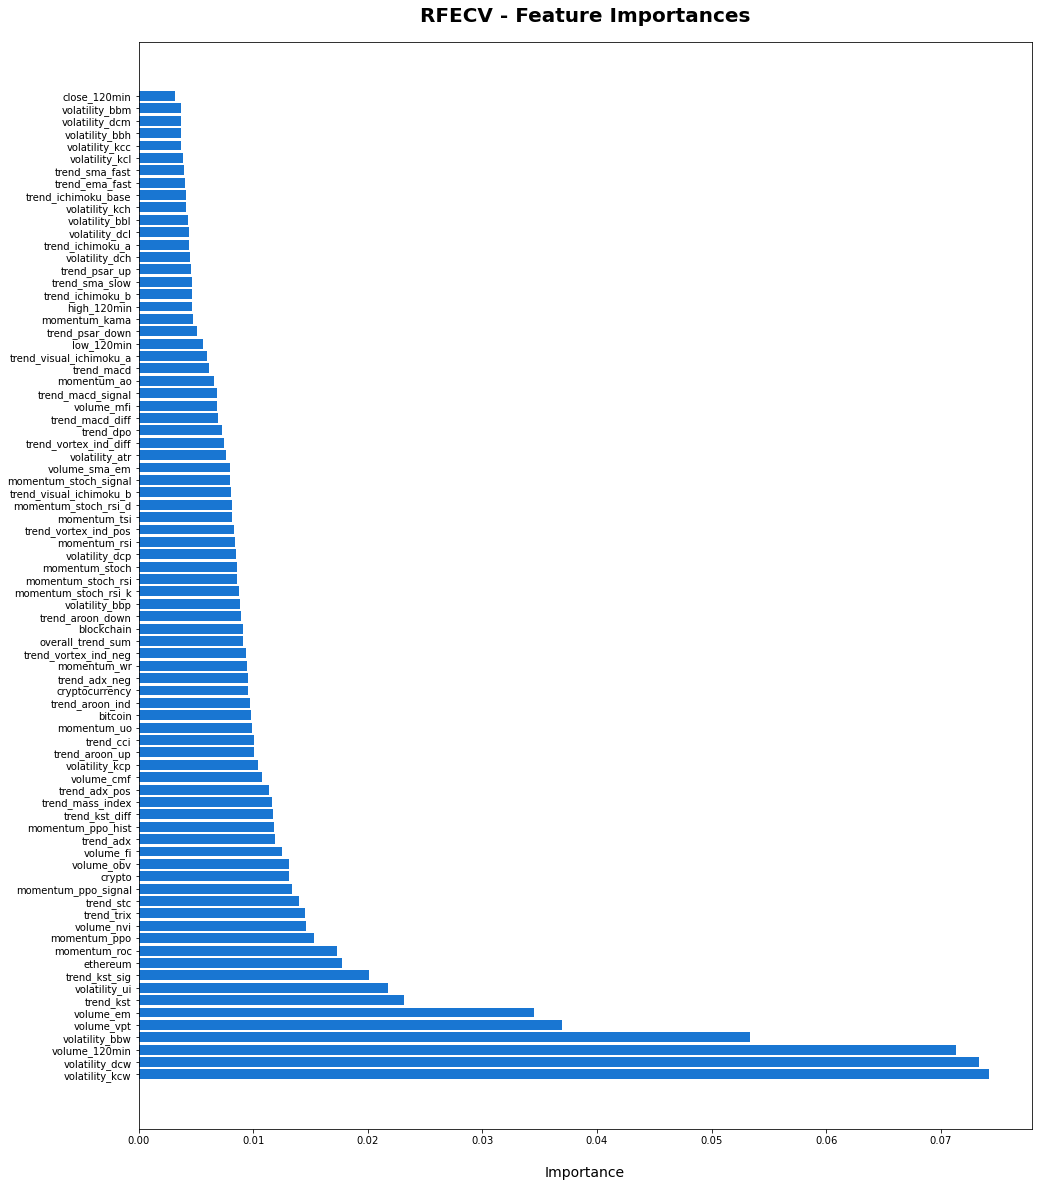

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv2.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 20))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [ ]:
X.shape

(34728, 80)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(target,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.390680
         Iterations 20
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.436     
Dependent Variable:         target_variable          AIC:                      27279.0960
Date:                       2021-12-06 08:50         BIC:                      27887.8777
No. Observations:           34728                    Log-Likelihood:           -13568.   
Df Model:                   71                       LL-Null:                  -24072.   
Df Residuals:               34656                    LLR p-value:              0.0000    
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             20.0000                                                      
-----------------------------------------------------------------------------------------
                          Coef.    

In [ ]:
vif_estimation_data_frame = add_constant(X)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True) 
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(10)

,col_names,vif_value
40,trend_vortex_ind_neg,inf
25,volatility_dch,inf
30,trend_macd,inf
31,trend_macd_signal,inf
32,trend_macd_diff,inf
39,trend_vortex_ind_pos,inf
41,trend_vortex_ind_diff,inf
46,trend_kst,inf
47,trend_kst_sig,inf
48,trend_kst_diff,inf


In [ ]:
X_vif_treated = X.copy().drop(['volume_vpt','volume_nvi','volatility_bbh','volume_fi','trend_aroon_ind','trend_macd_diff','momentum_ppo_signal','momentum_tsi','volatility_dcw','trend_vortex_ind_pos','momentum_stoch_signal','momentum_stoch','momentum_stoch_rsi_k','momentum_rsi','trend_adx','volatility_bbp','volatility_ui','trend_kst','trend_visual_ichimoku_a','trend_ichimoku_b','volatility_dcm','trend_macd','momentum_kama','volatility_dch','volatility_kch','volatility_bbl','trend_sma_slow','volatility_kcc','volatility_atr','trend_psar_up','trend_ichimoku_base','trend_visual_ichimoku_b','trend_sma_fast','trend_psar_down','trend_ichimoku_a','trend_ema_fast','trend_kst_diff','trend_macd_signal','volatility_bbm','volatility_dcl','volatility_kcl','momentum_wr','trend_aroon_down','trend_vortex_ind_diff','momentum_ppo','overall_trend_sum','close_120min','volume_120min','high_120min','low_120min'],axis=1)

In [ ]:
vif_estimation_data_frame = add_constant(X_vif_treated)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True) 
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(20)

,col_names,vif_value
0,const,4798.328425
8,volatility_kcp,11.941353
15,trend_cci,11.465823
12,trend_vortex_ind_neg,10.891185
10,trend_adx_pos,8.242396
7,volatility_kcw,7.307789
9,volatility_dcp,7.249779
6,volatility_bbw,6.663522
11,trend_adx_neg,6.600935
3,volume_mfi,6.509477


In [ ]:
X_vif_treated.head()

,volume_obv,volume_cmf,volume_mfi,volume_em,volume_sma_em,volatility_bbw,volatility_kcw,volatility_kcp,volatility_dcp,trend_adx_pos,...,momentum_stoch_rsi_d,momentum_uo,momentum_ao,momentum_roc,momentum_ppo_hist,bitcoin,ethereum,crypto,cryptocurrency,blockchain
0,0.617169,0.341789,0.672370,0.465075,0.458425,0.047630,0.090047,0.321312,0.441693,0.631615,...,0.350837,0.533112,0.642445,0.501118,0.481549,0.514544,0.063800,0.119774,0.246182,0.384847
1,0.443150,0.555052,0.873806,0.464233,0.458818,0.334751,0.165456,0.356267,0.898042,0.544298,...,0.867961,0.666221,0.665337,0.665979,0.212034,0.514557,0.078987,0.095215,0.162104,0.170635
2,0.649361,0.522427,0.495225,0.462629,0.458183,0.065735,0.088978,0.279248,0.512815,0.303877,...,0.975232,0.652043,0.629724,0.494140,0.149442,0.434307,0.068421,0.113095,0.316667,0.353846
3,0.772867,0.396207,0.778515,0.466758,0.459758,0.272892,0.189961,0.350240,0.784517,0.746554,...,0.905862,0.602636,0.687521,0.663398,0.196593,0.562908,0.086798,0.128027,0.325423,0.299610
4,0.630870,0.549338,0.410097,0.463640,0.458331,0.049772,0.051512,0.239545,0.665908,0.264582,...,0.896825,0.656557,0.639567,0.492270,0.251293,0.510949,0.063158,0.130952,0.250000,0.384615


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(target,X_vif_treated) #method='bfgs'
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.421134
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.392     
Dependent Variable:   target_variable    AIC:                29310.2749
Date:                 2021-12-06 09:29   BIC:                29563.9339
No. Observations:     34728              Log-Likelihood:     -14625.   
Df Model:             29                 LL-Null:            -24072.   
Df Residuals:         34698              LLR p-value:        0.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
volume_obv             0.6422   0.0890   7.2153 0.0000   0.4677

In [ ]:
x_test_vif_treated = x_test_balanced.copy().drop(['volume_vpt','volume_nvi','volatility_bbh','volume_fi','trend_aroon_ind','trend_macd_diff','momentum_ppo_signal','momentum_tsi','volatility_dcw','trend_vortex_ind_pos','momentum_stoch_signal','momentum_stoch','momentum_stoch_rsi_k','momentum_rsi','trend_adx','volatility_bbp','volatility_ui','trend_kst','trend_visual_ichimoku_a','trend_ichimoku_b','volatility_dcm','trend_macd','momentum_kama','volatility_dch','volatility_kch','volatility_bbl','trend_sma_slow','volatility_kcc','volatility_atr','trend_psar_up','trend_ichimoku_base','trend_visual_ichimoku_b','trend_sma_fast','trend_psar_down','trend_ichimoku_a','trend_ema_fast','trend_kst_diff','trend_macd_signal','volatility_bbm','volatility_dcl','volatility_kcl','momentum_wr','trend_aroon_down','trend_vortex_ind_diff','momentum_ppo','overall_trend_sum','close_120min','volume_120min','high_120min','low_120min'],axis=1)

In [ ]:
x_test_vif_treated.shape

(8708, 30)

In [ ]:
#X_vif_treated = X.copy().drop(['trend_vortex_ind_neg','trend_kst_sig','volume_obv','volatility_dcp','volatility_dcl','volatility_bbw','volatility_ui','momentum_stoch_signal','volatility_dcw','trend_adx_pos','momentum_wr','trend_aroon_up','trend_cci','momentum_stoch_rsi_d','volume_vpt','trend_macd','volatility_bbp','trend_visual_ichimoku_a','low_60min','trend_macd_signal','volatility_kch','volatility_bbm','trend_visual_ichimoku_b','trend_adx_neg','momentum_rsi','trend_stc','trend_kst','momentum_ao','trend_psar_up','trend_trix','momentum_roc','trend_kst_diff','momentum_stoch','trend_macd_diff','volume_vwap','volatility_dcm'],axis=1)

logit_model=sm.Logit(target,X_vif_treated)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.421134
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.392     
Dependent Variable:   target_variable    AIC:                29310.2749
Date:                 2021-12-06 09:30   BIC:                29563.9339
No. Observations:     34728              Log-Likelihood:     -14625.   
Df Model:             29                 LL-Null:            -24072.   
Df Residuals:         34698              LLR p-value:        0.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
volume_obv             0.6422   0.0890   7.2153 0.0000   0.4677

### sklearn logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
sklearn_logit_model = LogisticRegression(random_state=0).fit(X_vif_treated, target)

from sklearn.metrics import r2_score
y_predict = sklearn_logit_model.predict(x_test_vif_treated)
print(r2_score(y_test_balanced, y_predict))

0.028020211299954023


In [ ]:
print(classification_report(y_test_balanced,y_predict))
print(confusion_matrix(y_test_balanced,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      4354
           1       0.81      0.68      0.74      4354

    accuracy                           0.76      8708
   macro avg       0.76      0.76      0.76      8708
weighted avg       0.76      0.76      0.76      8708

[[3644  710]
 [1406 2948]]


<BarContainer object of 30 artists>

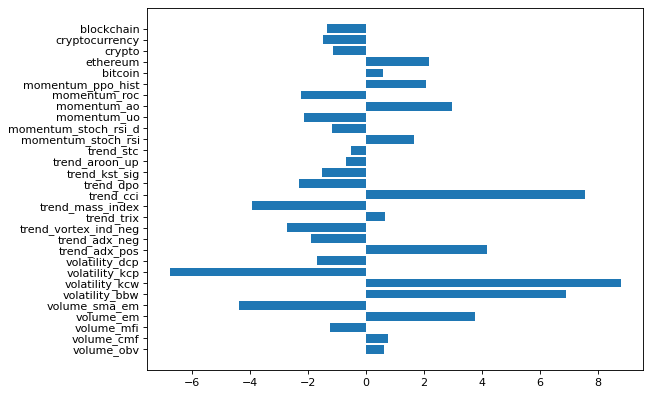

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
importance = sklearn_logit_model.coef_[0]
figure(figsize=(8, 6), dpi=80)
plt.barh(X_vif_treated.columns, importance)

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_vif_treated.columns, importance):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
print(importances)

                      Feature importance
volume_obv                      0.623404
volume_cmf                      0.775946
volume_mfi                     -1.232103
volume_em                       3.755244
volume_sma_em                  -4.372827
volatility_bbw                  6.924858
volatility_kcw                  8.805152
volatility_kcp                 -6.757149
volatility_dcp                 -1.693828
trend_adx_pos                   4.198539
trend_adx_neg                  -1.879868
trend_vortex_ind_neg           -2.714811
trend_trix                      0.655577
trend_mass_index               -3.915903
trend_cci                       7.552577
trend_dpo                      -2.313218
trend_kst_sig                  -1.513230
trend_aroon_up                 -0.674202
trend_stc                      -0.497847
momentum_stoch_rsi              1.666858
momentum_stoch_rsi_d           -1.148382
momentum_uo                    -2.142949
momentum_ao                     2.978900
momentum_roc    

### sklearn random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_vif_treated, target)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test_vif_treated)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))


ACCURACY OF THE MODEL:  0.7028020211299955


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      4354
           1       0.95      0.43      0.59      4354

    accuracy                           0.70      8708
   macro avg       0.79      0.70      0.68      8708
weighted avg       0.79      0.70      0.68      8708

[[4260   94]
 [2494 1860]]


<BarContainer object of 30 artists>

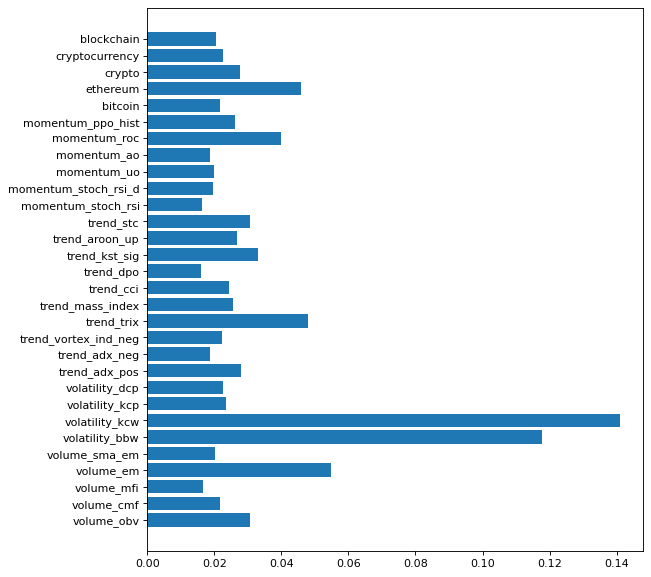

In [ ]:
figure(figsize=(8, 9), dpi=80)
plt.barh(X_vif_treated.columns, clf.feature_importances_)

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_vif_treated.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
print(importances)

                      Feature importance
volume_obv                      0.030652
volume_cmf                      0.021542
volume_mfi                      0.016521
volume_em                       0.054737
volume_sma_em                   0.020250
volatility_bbw                  0.117760
volatility_kcw                  0.140967
volatility_kcp                  0.023462
volatility_dcp                  0.022462
trend_adx_pos                   0.027916
trend_adx_neg                   0.018748
trend_vortex_ind_neg            0.022264
trend_trix                      0.047883
trend_mass_index                0.025420
trend_cci                       0.024478
trend_dpo                       0.016023
trend_kst_sig                   0.033032
trend_aroon_up                  0.026771
trend_stc                       0.030633
momentum_stoch_rsi              0.016168
momentum_stoch_rsi_d            0.019700
momentum_uo                     0.019940
momentum_ao                     0.018724
momentum_roc    

### XG Boost classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
# fit the model
model.fit(X_vif_treated, target)

[09:30:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(x_test_vif_treated)


# get importance
importance = model.feature_importances_

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))


ACCURACY OF THE MODEL:  0.9359209921910887


<BarContainer object of 30 artists>

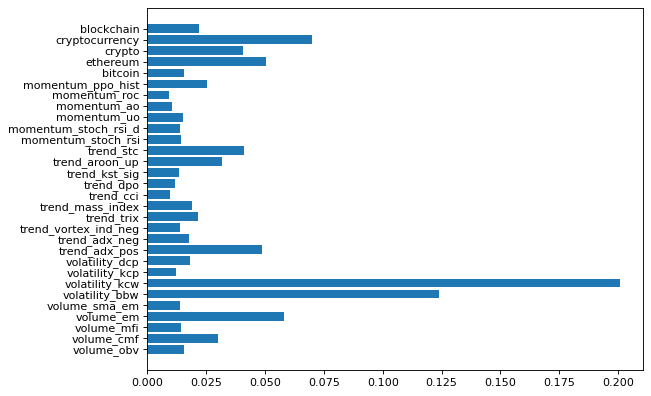

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.barh(X_vif_treated.columns, model.feature_importances_)

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_vif_treated.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
print(importances)

                      Feature importance
volume_obv                      0.015745
volume_cmf                      0.030021
volume_mfi                      0.014262
volume_em                       0.058045
volume_sma_em                   0.013820
volatility_bbw                  0.123706
volatility_kcw                  0.200709
volatility_kcp                  0.012081
volatility_dcp                  0.018139
trend_adx_pos                   0.048525
trend_adx_neg                   0.017512
trend_vortex_ind_neg            0.013765
trend_trix                      0.021349
trend_mass_index                0.018839
trend_cci                       0.009724
trend_dpo                       0.011853
trend_kst_sig                   0.013433
trend_aroon_up                  0.031645
trend_stc                       0.040970
momentum_stoch_rsi              0.014096
momentum_stoch_rsi_d            0.013738
momentum_uo                     0.015060
momentum_ao                     0.010330
momentum_roc    

In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4354
           1       0.99      0.88      0.93      4354

    accuracy                           0.94      8708
   macro avg       0.94      0.94      0.94      8708
weighted avg       0.94      0.94      0.94      8708

[[4316   38]
 [ 520 3834]]


### K neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [ ]:
model = KNeighborsClassifier()
model.fit(X_vif_treated, target)


KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test_vif_treated)

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))


ACCURACY OF THE MODEL:  0.6725999081304548


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.90      0.73      4354
           1       0.81      0.45      0.58      4354

    accuracy                           0.67      8708
   macro avg       0.72      0.67      0.66      8708
weighted avg       0.72      0.67      0.66      8708

[[3899  455]
 [2396 1958]]


In [ ]:
# get importance
results = permutation_importance(model, X_vif_treated, target, scoring='neg_mean_squared_error',n_jobs=-1)
# get importance
importance = results.importances_mean

<BarContainer object of 30 artists>

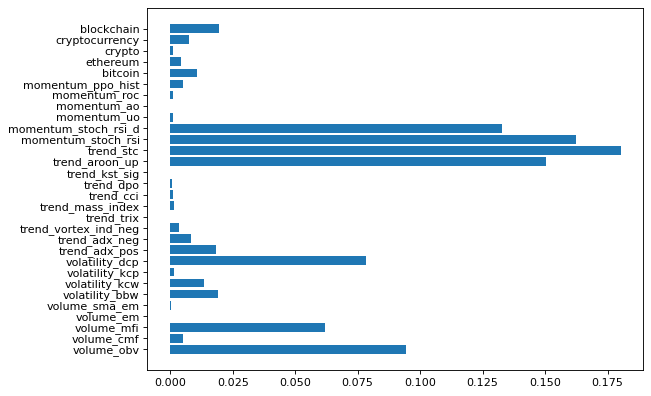

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.barh(X_vif_treated.columns, importance)

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_vif_treated.columns, importance):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
print(importances)

                      Feature importance
volume_obv                      0.094264
volume_cmf                      0.005131
volume_mfi                      0.061708
volume_em                      -0.000006
volume_sma_em                   0.000392
volatility_bbw                  0.019034
volatility_kcw                  0.013511
volatility_kcp                  0.001492
volatility_dcp                  0.078346
trend_adx_pos                   0.018463
trend_adx_neg                   0.008166
trend_vortex_ind_neg            0.003288
trend_trix                     -0.000012
trend_mass_index                0.001607
trend_cci                       0.001019
trend_dpo                       0.000737
trend_kst_sig                  -0.000161
trend_aroon_up                  0.150415
trend_stc                       0.180344
momentum_stoch_rsi              0.162255
momentum_stoch_rsi_d            0.132867
momentum_uo                     0.001163
momentum_ao                    -0.000155
momentum_roc    

In [ ]:
X_vif_treated.shape

(34728, 30)

### Defining Neural Network Structure

In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(30, activation='relu', input_shape=(30,)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

### Neural Network Training with target metrics as Accuracy

In [ ]:
import tensorflow as tf
import keras
import keras.backend as K

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision()])
                   
model.fit(X_vif_treated, target,epochs=30, batch_size=5, verbose=1)

Epoch 1/30
6946/6946 [==============================] - 10s 1ms/step - loss: 0.4434 - precision: 0.8012
Epoch 2/30
6946/6946 [==============================] - 9s 1ms/step - loss: 0.4061 - precision: 0.8038
Epoch 3/30
6946/6946 [==============================] - 8s 1ms/step - loss: 0.3910 - precision: 0.8109
Epoch 4/30
6946/6946 [==============================] - 8s 1ms/step - loss: 0.3790 - precision: 0.8141
Epoch 5/30
6946/6946 [==============================] - 9s 1ms/step - loss: 0.3683 - precision: 0.8179
Epoch 6/30
6946/6946 [==============================] - 9s 1ms/step - loss: 0.3583 - precision: 0.8225
Epoch 7/30
6946/6946 [==============================] - 9s 1ms/step - loss: 0.3506 - precision: 0.8235
Epoch 8/30
6946/6946 [==============================] - 9s 1ms/step - loss: 0.3424 - precision: 0.8261
Epoch 9/30
6946/6946 [==============================] - 8s 1ms/step - loss: 0.3341 - precision: 0.8298
Epoch 10/30
6946/6946 [==============================] - 9s 1ms/step - l

In [ ]:
y_pred = model.predict(x_test_vif_treated)

In [ ]:
y_pred

array([[9.4513535e-02],
       [1.4269352e-04],
       [1.7872131e-01],
       ...,
       [9.2878771e-01],
       [5.9289038e-03],
       [8.8824832e-01]], dtype=float32)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True) 

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0
y_pred.head()

,output_prob
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
y_pred.round(0)
y_pred['output_prob'].astype(int)
y_pred.head()

,output_prob
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
y_pred.value_counts()

output_prob
0.0            4882
1.0            3826
dtype: int64

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))

ACCURACY OF THE MODEL:  0.776757005052825


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4354
           1       0.81      0.72      0.76      4354

    accuracy                           0.78      8708
   macro avg       0.78      0.78      0.78      8708
weighted avg       0.78      0.78      0.78      8708

[[3646  708]
 [1236 3118]]


### SVM model

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_vif_treated, target) 

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_test_vif_treated)

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_balanced, y_pred))

ACCURACY OF THE MODEL:  0.7680293982544787


In [ ]:
print(classification_report(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      4354
           1       0.81      0.70      0.75      4354

    accuracy                           0.77      8708
   macro avg       0.77      0.77      0.77      8708
weighted avg       0.77      0.77      0.77      8708

[[3630  724]
 [1296 3058]]


<BarContainer object of 30 artists>

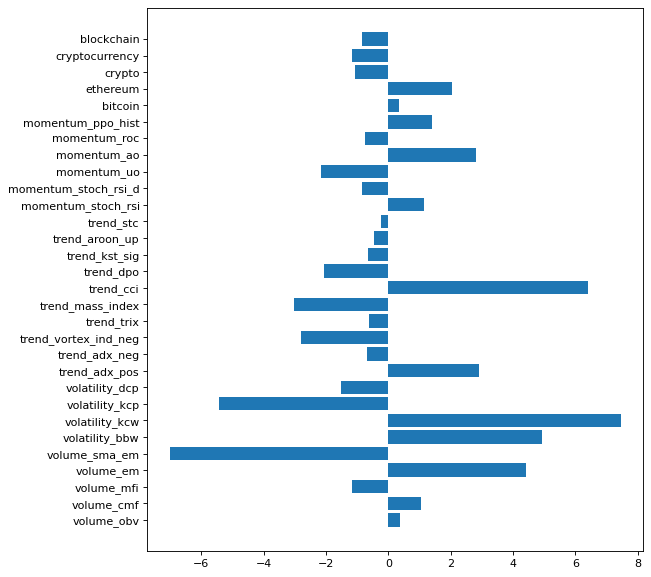

In [ ]:
figure(figsize=(8, 9), dpi=80)
importance = clf.coef_[0]
plt.barh(X_vif_treated.columns, importance)

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_vif_treated.columns, importance):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
print(importances)

                      Feature importance
volume_obv                      0.359322
volume_cmf                      1.056329
volume_mfi                     -1.164320
volume_em                       4.401141
volume_sma_em                  -7.005991
volatility_bbw                  4.926993
volatility_kcw                  7.458655
volatility_kcp                 -5.435899
volatility_dcp                 -1.531897
trend_adx_pos                   2.921943
trend_adx_neg                  -0.679556
trend_vortex_ind_neg           -2.803607
trend_trix                     -0.628526
trend_mass_index               -3.027511
trend_cci                       6.407388
trend_dpo                      -2.061485
trend_kst_sig                  -0.640270
trend_aroon_up                 -0.456761
trend_stc                      -0.240180
momentum_stoch_rsi              1.145631
momentum_stoch_rsi_d           -0.855231
momentum_uo                    -2.161758
momentum_ao                     2.823107
momentum_roc    

### Neural Network Training with target metrics as True Positives

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.TruePositives()])
                   
model.fit(X_vif_treated, target,epochs=5, batch_size=1, verbose=1)

In [ ]:
y_pred = model.predict(x_test_vif_treated)
y_pred

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True) 

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0
y_pred.head()

In [ ]:
y_pred.round(0)
y_pred['output_prob'].astype(int)
y_pred.head()

In [ ]:
y_pred.value_counts()

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### Neural Network Training with target metrics as Precision

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision()])
                   
model.fit(X_vif_treated, target,epochs=5, batch_size=1, verbose=1)

In [ ]:
y_pred = model.predict(x_test_vif_treated)
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True) 

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0

y_pred.round(0)
y_pred['output_prob'].astype(int)

y_pred.value_counts()

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### Neural Network Training with target metrics as AUC

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC()])
                   
model.fit(X_vif_treated, target,epochs=5, batch_size=1, verbose=1)

In [ ]:
y_pred = model.predict(x_test_vif_treated)
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True) 

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0

y_pred.round(0)
y_pred['output_prob'].astype(int)

y_pred.value_counts()

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### Neural Network Training with target metrics as AUC and increased depth+neurons

In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(20, activation='relu', input_shape=(20,)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))

# Add one hidden layer 
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(5, activation='relu'))

# Add one hidden layer 
model.add(Dense(2, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC()])
                   
model.fit(X_vif_treated, target,epochs=5, batch_size=1, verbose=1)

In [ ]:
y_pred = model.predict(x_test_vif_treated)
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True) 

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0

y_pred.round(0)
y_pred['output_prob'].astype(int)

y_pred.value_counts()

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### Neural Network Training with target metrics as True Positives with increased depth

In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(20, activation='relu', input_shape=(20,)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))

# Add one hidden layer 
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(5, activation='relu'))

# Add one hidden layer 
model.add(Dense(2, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.TruePositives()])
                   
model.fit(X_vif_treated, target,epochs=5, batch_size=1, verbose=1)

In [ ]:
y_pred = model.predict(x_test_vif_treated)
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns = {0:'output_prob'}, inplace = True) 

y_pred['output_prob'].loc[(y_pred['output_prob']) >0.5] = 1
y_pred['output_prob'].loc[(y_pred['output_prob']) <=0.5] = 0

y_pred.round(0)
y_pred['output_prob'].astype(int)

y_pred.value_counts()

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### Imbalanced dataset
#### R-Sq: 0.55 for profitable intervals by price open param 
#### R-Sq: 0.5 for profitable intervals by price close param 
#### R-Sq: 0.29 for profitable intervals by price high param 
#### R-Sq: 0.27 for profitable intervals by price low param 
#### R-Sq: 0.57 for profitable intervals by price open 1.025 param
#### R-Sq: 0.33 for profitable intervals by price open 1.01 param

### Balanced dataset
#### R-Sq:  for profitable intervals by price open 1.025 param
#### R-Sq:  0.69 for profitable intervals by price open 1.01 param